In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt\

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=pd.read_csv("healthcare-dataset-stroke-data.csv")


df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
missing_values = df.isna()

# Count the missing values in each column
missing_counts = missing_values.sum()
missing_counts

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
columns_with_null = ['bmi']
df.dropna(subset=columns_with_null, inplace=True)

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
missing_values = df.isna()

# Count the missing values in each column
missing_counts = missing_values.sum()
missing_counts

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop('id',axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(4909, 12)

In [ ]:
df.drop('id',axis=1,inplace=True)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-117-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [ ]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# List of columns to convert to categorical factors
columns_to_convert = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Convert the selected columns to categorical factors
for column in columns_to_convert:
    df[column] = df[column].astype('category')

# Display the DataFrame with categorical factors
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5104  Female  13.0             0              0           No       children   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

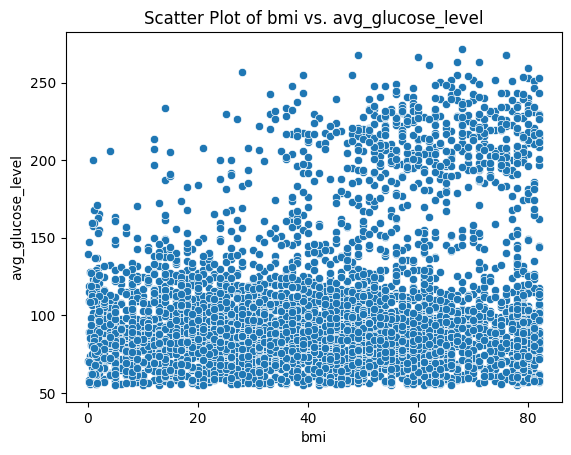

In [ ]:
sns.scatterplot(x=df['age'], y=df['avg_glucose_level'])
plt.xlabel('bmi')
plt.ylabel('avg_glucose_level')
plt.title('Scatter Plot of bmi vs. avg_glucose_level')
plt.show()

<Axes: xlabel='age', ylabel='bmi'>

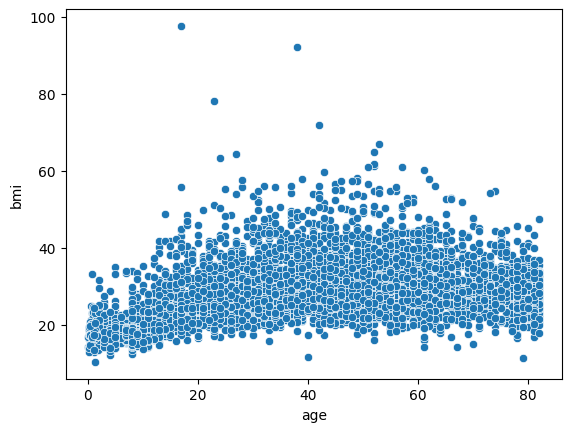

In [ ]:
sns.scatterplot(x=df['age'], y=df['bmi'])

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

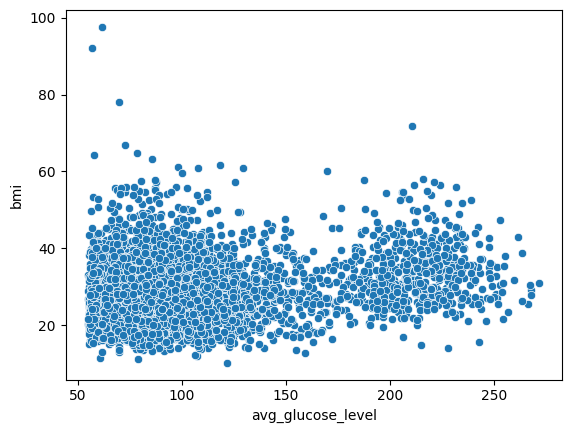

In [ ]:
sns.scatterplot(x=df['avg_glucose_level'], y=df['bmi'])

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

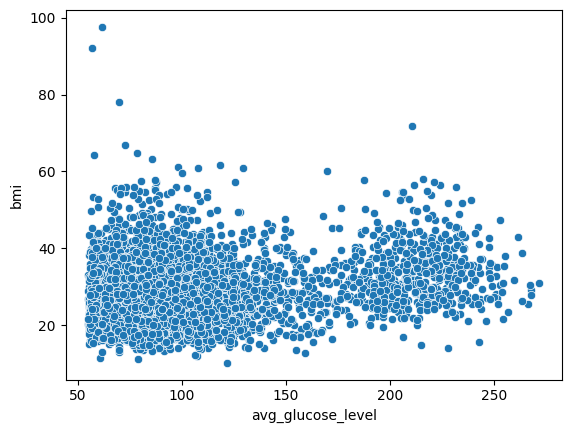

In [ ]:
sns.scatterplot(x=df['avg_glucose_level'], y=df['bmi'])

<Axes: xlabel='smoking_status', ylabel='age'>

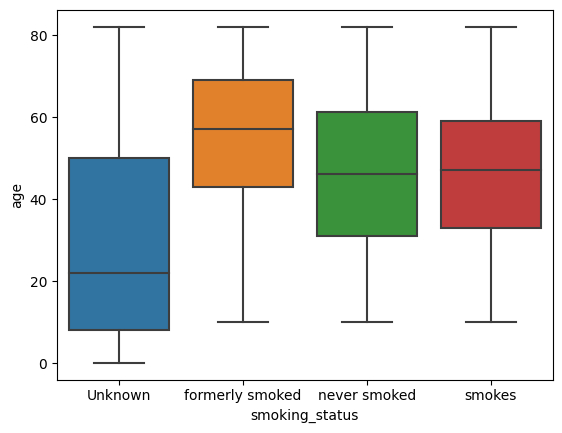

In [ ]:
sns.boxplot(x=df['smoking_status'], y=df['age'])

In [ ]:
df.columns



Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

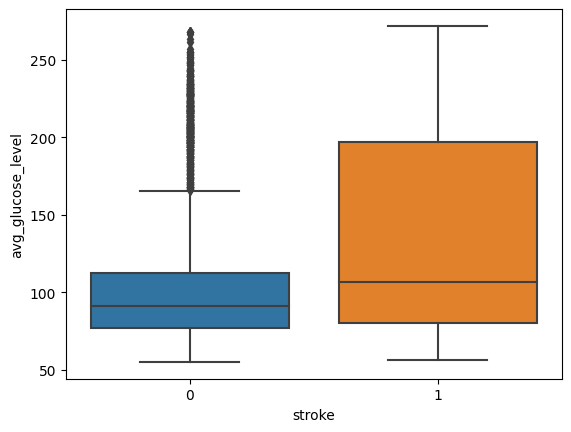

In [ ]:
sns.boxplot(x=df['stroke'], y=df['avg_glucose_level'])


<Axes: xlabel='stroke', ylabel='bmi'>

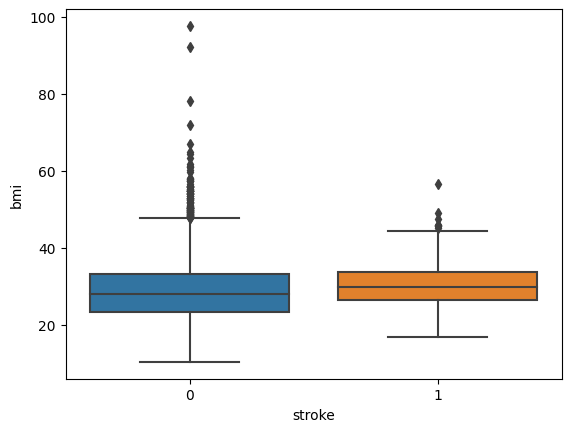

In [ ]:
sns.boxplot(x=df['stroke'], y=df['bmi'])


<Axes: xlabel='heart_disease', ylabel='avg_glucose_level'>

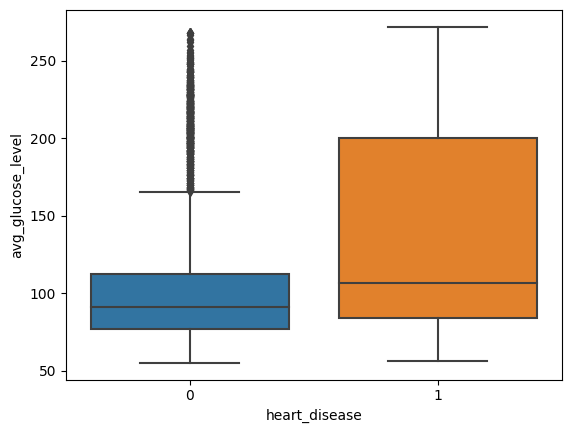

In [ ]:
sns.boxplot(x=df['heart_disease'], y=df['avg_glucose_level'])

<Axes: xlabel='heart_disease', ylabel='age'>

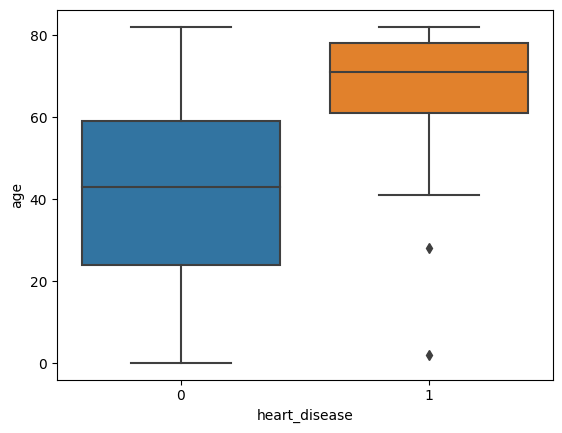

In [ ]:
sns.boxplot(x=df['heart_disease'], y=df['age'])

<Axes: xlabel='stroke', ylabel='age'>

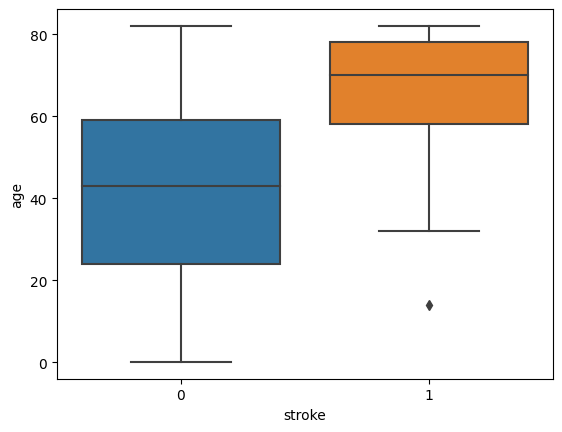

In [ ]:
sns.boxplot(x=df['stroke'], y=df['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

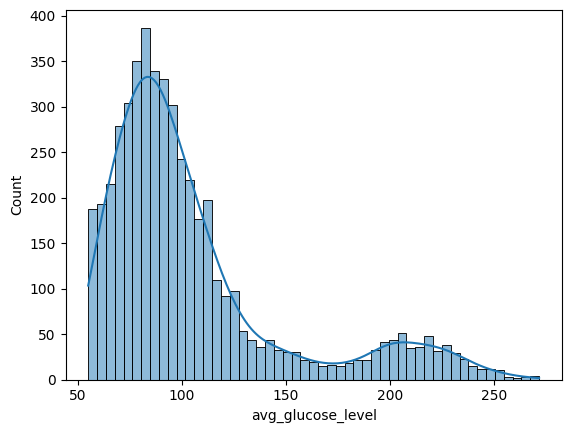

In [ ]:
sns.histplot(x=df['avg_glucose_level'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

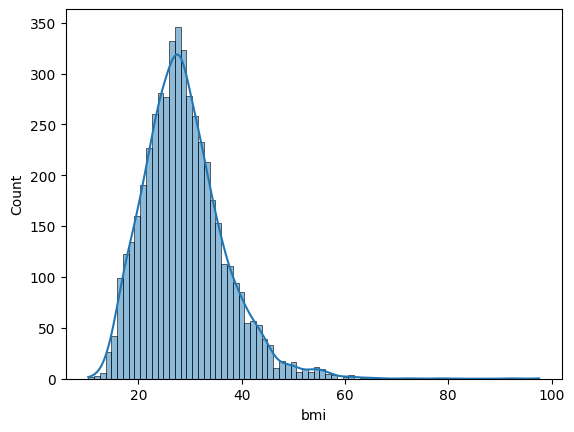

In [ ]:
sns.histplot(x=df['bmi'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

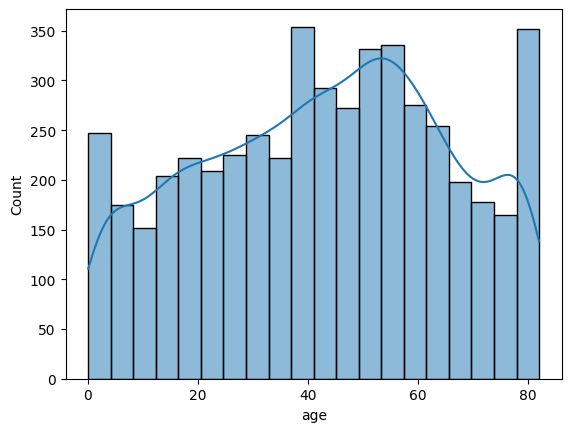

In [ ]:
sns.histplot(x=df['age'], kde=True)

<Axes: xlabel='hypertension', ylabel='age'>

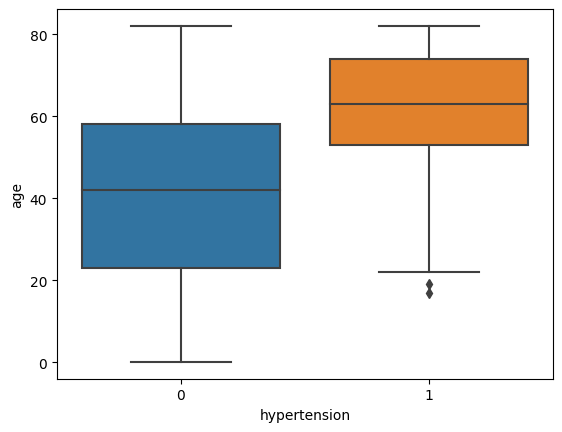

In [ ]:
sns.boxplot(x=df['hypertension'], y=df['age'])


<Axes: xlabel='gender', ylabel='avg_glucose_level'>

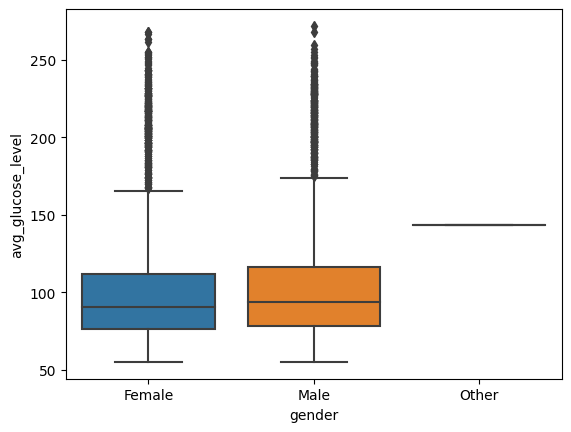

In [ ]:
sns.boxplot(y=df['avg_glucose_level'], x=df['gender'])

<Axes: xlabel='hypertension', ylabel='avg_glucose_level'>

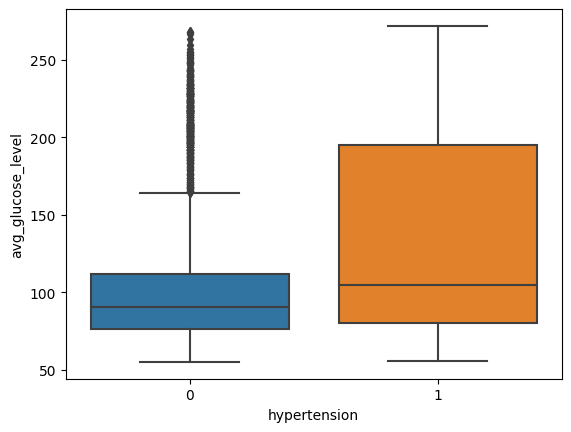

In [ ]:
sns.boxplot(x=df['hypertension'], y=df['avg_glucose_level'])


<Axes: xlabel='smoking_status', ylabel='avg_glucose_level'>

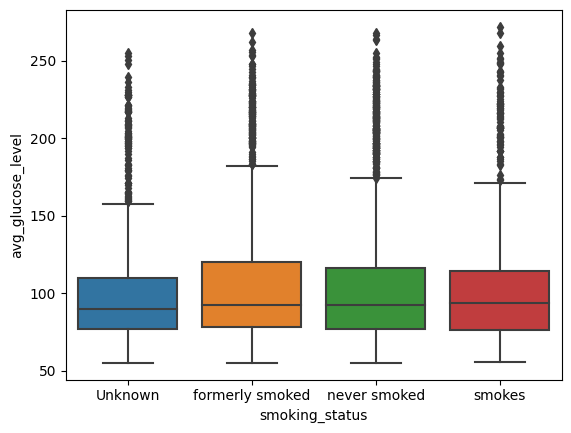

In [ ]:
sns.boxplot(x=df['smoking_status'], y=df['avg_glucose_level'])


<Axes: xlabel='age', ylabel='smoking_status'>

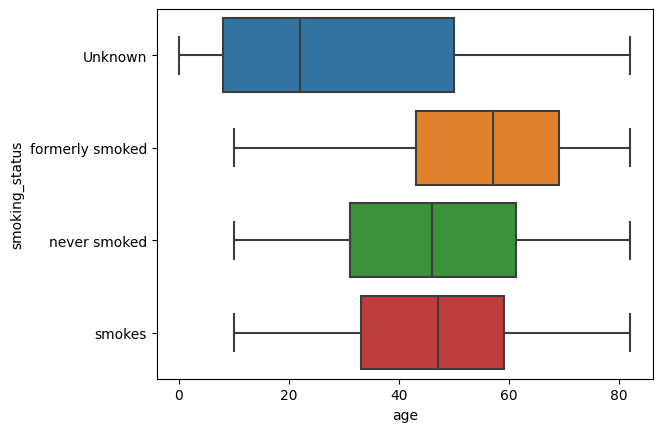

In [ ]:
sns.boxplot(x=df['age'], y=df['smoking_status'])

In [ ]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Select features and target variable
x = df[['gender','age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y = df['stroke']

# Split the data into training and testing sets
x_train, x_test,  y_train , y_test= train_test_split(x, y, test_size=0.20)
x_test


KeyError: ignored

In [ ]:
y_train

68      1
4262    0
4670    0
4909    0
797     0
       ..
4292    0
113     1
208     1
2609    0
2955    0
Name: stroke, Length: 3927, dtype: int64

In [ ]:
y_test

4260    0
2154    0
4866    0
4363    0
995     0
       ..
4123    0
4869    0
1723    0
2503    0
1550    0
Name: stroke, Length: 982, dtype: int64

In [ ]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4260,Male,64.0,0,0,Yes,Private,Urban,62.21,28.3,Unknown
2154,Male,7.0,0,0,No,children,Rural,62.08,16.1,Unknown
4866,Female,37.0,0,0,Yes,Private,Urban,103.66,36.1,smokes
4363,Male,15.0,0,0,No,Private,Urban,55.79,21.3,never smoked
995,Male,1.4,0,0,No,children,Urban,90.51,18.9,Unknown
...,...,...,...,...,...,...,...,...,...,...
4123,Male,68.0,0,1,Yes,Private,Urban,217.74,25.5,Unknown
4869,Female,50.0,0,1,Yes,Private,Urban,193.80,26.4,never smoked
1723,Female,57.0,0,0,Yes,Govt_job,Urban,219.50,33.8,formerly smoked
2503,Male,49.0,0,0,Yes,Private,Rural,96.35,35.9,never smoked


In [ ]:
# List of columns to one-hot encode
columns_to_encode = ['gender','ever_married', 'work_type',	'Residence_type', 'smoking_status']

# Perform one-hot encoding for the specified columns
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

# Display the DataFrame with one-hot encoding
print(df)


       age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
5     81.0             0              0             186.21  29.0       1   
...    ...           ...            ...                ...   ...     ...   
5104  13.0             0              0             103.08  18.6       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              

In [ ]:

# Log transformation on selected columns
columns_to_transform = ['hypertension', 'heart_disease']
df[columns_to_transform] = df[columns_to_transform].applymap(lambda x: np.log(x + 1))

print(df)
df.columns


       age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0      0.000000       0.526589             228.69  36.6       1   
2     80.0      0.000000       0.526589             105.92  32.5       1   
3     49.0      0.000000       0.000000             171.23  34.4       1   
4     79.0      0.526589       0.000000             174.12  24.0       1   
5     81.0      0.000000       0.000000             186.21  29.0       1   
...    ...           ...            ...                ...   ...     ...   
5104  13.0      0.000000       0.000000             103.08  18.6       0   
5106  81.0      0.000000       0.000000             125.20  40.0       0   
5107  35.0      0.000000       0.000000              82.99  30.6       0   
5108  51.0      0.000000       0.000000             166.29  25.6       0   
5109  44.0      0.000000       0.000000              85.28  26.2       0   

      gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In this code:

columns_to_encode is a list containing the names of the columns you want to one-hot encode.

pd.get_dummies() is used with the columns parameter set to the list of columns you want to encode.

The result will be a DataFrame with one-hot encoded columns for the specified categorical columns. Each category within the original columns will become a new binary column in the encoded DataFrame.

Make sure to replace the sample data with your actual DataFrame and adjust the list of columns in columns_to_encode to match the columns you want to encode.

In this code:

columns_to_transform is a list containing the names of the columns you want to transform.

The applymap() function is used to apply the lambda function to each cell of the selected columns.

The lambda function applies the natural logarithm (base e) transformation to each value, and we add 1 to each value before taking the logarithm to avoid log(0), which is undefined. If your data may contain zeros, this addition is necessary.

This code will perform a log transformation on the 'hypertension' and 'heart_disease' columns and store the transformed values in the same DataFrame. You can adjust this code to work with your actual DataFrame.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Define your independent variables (features) and the dependent variable (target)
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display model evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9460285132382892
Confusion Matrix:
[[929   0]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In this code:

Load your dataset by specifying the file path in pd.read_csv('your_data.csv'). Replace 'your_data.csv' with the path to your dataset.

Define your independent variables (features) and the dependent variable (target). Replace 'feature1', 'feature2', 'feature3' and 'target' with the actual column names in your dataset.

Split the data into training and testing sets using train_test_split.

Create a logistic regression model using LogisticRegression() from scikit-learn and train it on the training data using model.fit().

Make predictions on the test set with model.predict().

Evaluate the model's performance using accuracy, a confusion matrix, and a classification report.

Replace the placeholders in the code with your actual data and column names. This example demonstrates a basic logistic regression model. Depending on your specific problem, you may need to preprocess data, handle categorical variables, and perform feature engineering to improve model performance.